In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import load_model

def saveTestTrainData(filename, data):
  with open(filename, 'wb') as f:
    np.save(f, data)

def loadTestTrainData(filename): # e.g., 'test.npy'    
  with open(filename, 'rb') as f:
    a = np.load(f, allow_pickle=True)
    return a

drive_path = '/content/drive/MyDrive/AI/'

In [ ]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) 							#設定影像的大小
    if num>25 : num =25        							#設定顯示最大項數
    for i in range(0,num):   							#for回圈畫出num個數字影像
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary') 			#建立subgraph子圖形為五行五列
        for j in range(0, len(labels[i])):
          if labels[i][j] == 1:
            break
        title = "label="+label_dict[j]+"\n"				#設定子圖形title，顯示標簽欄位
        for k in range(0, len(prediction[i])):
          if prediction[i][k] == 1:
            break
        if len(prediction)>0:						  	#如果傳入了預測結果
            title+="prediction="+label_dict[k]	#標題

        ax.set_title(title,fontsize=10)        #設定子圖形的標題
        ax.set_xticks([]);ax.set_yticks([])    #設定不顯示刻度
        idx+=1                                 #讀取下一項
    plt.show()

label_dict={0:"airplane",1:"car",2:"cat",3:"dog",4:"flower",5:"fruit",6:"motorbike",7:"person"}

**============================================================================**

In [ ]:
labels = os.listdir('/content/drive/MyDrive/natural_images/')
print(labels)

['motorbike', 'cat', 'airplane', 'dog', 'fruit', 'car', 'person', 'flower']


In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/content/drive/MyDrive/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
#converting the y_data into categorical:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [ ]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
saveTestTrainData(drive_path + "x_train.npy", X_train)
saveTestTrainData(drive_path + "x_test.npy", X_test)
saveTestTrainData(drive_path + "y_train.npy", Y_train)
saveTestTrainData(drive_path + "y_test.npy", Y_test)

**============================================================================**

In [ ]:
x_train = loadTestTrainData(drive_path + "x_train.npy")
y_train = loadTestTrainData(drive_path + "y_train.npy")
x_test = loadTestTrainData(drive_path + "x_test.npy")
y_test = loadTestTrainData(drive_path + "y_test.npy")

**============================================================================**

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(8)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                      

In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [ ]:
EPOCHS=25
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)
model.save(drive_path + "5model_" + str(EPOCHS) + ".h5")

Epoch 1/25
138/138 [==============================] - 17s 29ms/step - loss: 1.0298 - accuracy: 0.6815 - val_loss: 1.1801 - val_accuracy: 0.6658
Epoch 2/25
138/138 [==============================] - 3s 19ms/step - loss: 0.4954 - accuracy: 0.8183 - val_loss: 0.4681 - val_accuracy: 0.8496
Epoch 3/25
138/138 [==============================] - 3s 18ms/step - loss: 0.3885 - accuracy: 0.8564 - val_loss: 0.3518 - val_accuracy: 0.8705
Epoch 4/25
138/138 [==============================] - 3s 19ms/step - loss: 0.3048 - accuracy: 0.8870 - val_loss: 0.3381 - val_accuracy: 0.8795
Epoch 5/25
138/138 [==============================] - 3s 19ms/step - loss: 0.2640 - accuracy: 0.8981 - val_loss: 0.6241 - val_accuracy: 0.8197
Epoch 6/25
138/138 [==============================] - 3s 18ms/step - loss: 0.2304 - accuracy: 0.9123 - val_loss: 0.4099 - val_accuracy: 0.8623
Epoch 7/25
138/138 [==============================] - 3s 19ms/step - loss: 0.1929 - accuracy: 0.9228 - val_loss: 0.2419 - val_accuracy: 0.918

In [ ]:
print("train")
train_loss_acc = model.evaluate(x_train, y_train)
print("test")
test_loss_acc = model.evaluate(x_test, y_test)

train
173/173 [==============================] - 2s 9ms/step - loss: 0.0860 - accuracy: 0.9714
test
44/44 [==============================] - 0s 10ms/step - loss: 0.3227 - accuracy: 0.8993


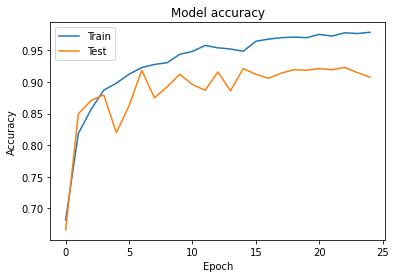

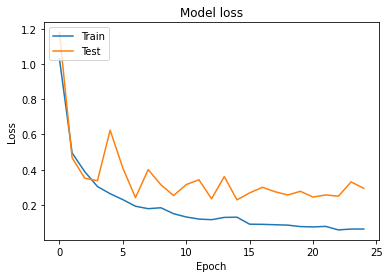

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
del model
EPOCHS=25
model = load_model(drive_path + "5model_" + str(EPOCHS) + ".h5")

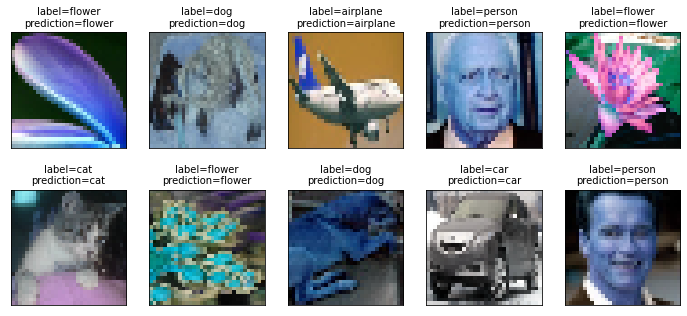

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
plot_images_labels_prediction(x_test,y_test,predictions,0,10)

In [ ]:
EPOCHS=100
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)
model.save(drive_path + "5model_" + str(EPOCHS) + ".h5")

Epoch 1/100
138/138 [==============================] - 15s 23ms/step - loss: 0.9893 - accuracy: 0.6933 - val_loss: 0.7706 - val_accuracy: 0.7473
Epoch 2/100
138/138 [==============================] - 3s 19ms/step - loss: 0.4780 - accuracy: 0.8331 - val_loss: 0.4660 - val_accuracy: 0.8487
Epoch 3/100
138/138 [==============================] - 3s 19ms/step - loss: 0.3650 - accuracy: 0.8634 - val_loss: 0.6200 - val_accuracy: 0.8170
Epoch 4/100
138/138 [==============================] - 3s 19ms/step - loss: 0.2910 - accuracy: 0.8929 - val_loss: 0.3192 - val_accuracy: 0.8922
Epoch 5/100
138/138 [==============================] - 2s 18ms/step - loss: 0.2759 - accuracy: 0.8990 - val_loss: 0.2827 - val_accuracy: 0.9022
Epoch 6/100
138/138 [==============================] - 3s 19ms/step - loss: 0.2294 - accuracy: 0.9176 - val_loss: 0.3102 - val_accuracy: 0.8804
Epoch 7/100
138/138 [==============================] - 2s 18ms/step - loss: 0.1930 - accuracy: 0.9271 - val_loss: 0.2629 - val_accuracy

In [ ]:
print("train")
train_loss_acc = model.evaluate(x_train, y_train)
print("test")
test_loss_acc = model.evaluate(x_test, y_test)

train
173/173 [==============================] - 2s 12ms/step - loss: 0.1068 - accuracy: 0.9735
test
44/44 [==============================] - 1s 14ms/step - loss: 0.3456 - accuracy: 0.9188


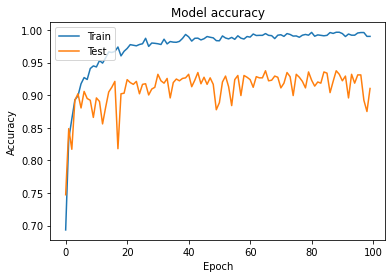

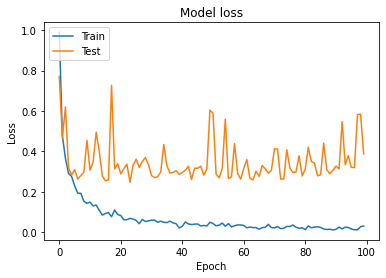

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
del model
EPOCHS=100
model = load_model(drive_path + "5model_" + str(EPOCHS) + ".h5")

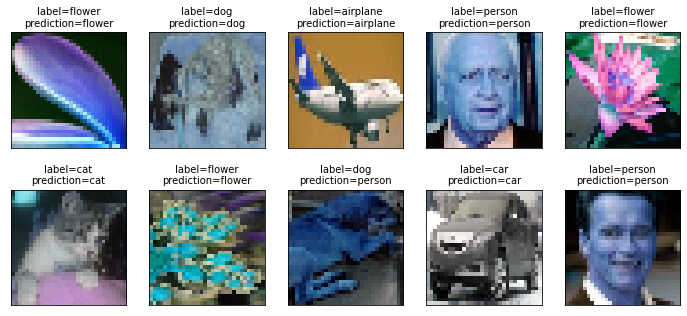

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
plot_images_labels_prediction(x_test,y_test,predictions,0,10)

**============================================================================**

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(8)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_8 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [ ]:
EPOCHS=25
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)
model.save(drive_path + "9model_" + str(EPOCHS) + ".h5")

Epoch 1/25
138/138 [==============================] - 7s 27ms/step - loss: 1.7892 - accuracy: 0.3642 - val_loss: 1.6134 - val_accuracy: 0.4511
Epoch 2/25
138/138 [==============================] - 3s 21ms/step - loss: 1.2145 - accuracy: 0.5762 - val_loss: 1.4733 - val_accuracy: 0.4864
Epoch 3/25
138/138 [==============================] - 3s 21ms/step - loss: 0.9025 - accuracy: 0.6820 - val_loss: 0.6055 - val_accuracy: 0.7663
Epoch 4/25
138/138 [==============================] - 3s 21ms/step - loss: 0.7427 - accuracy: 0.7343 - val_loss: 0.7651 - val_accuracy: 0.7418
Epoch 5/25
138/138 [==============================] - 3s 21ms/step - loss: 0.6319 - accuracy: 0.7719 - val_loss: 0.6479 - val_accuracy: 0.7908
Epoch 6/25
138/138 [==============================] - 3s 21ms/step - loss: 0.6006 - accuracy: 0.7925 - val_loss: 0.7131 - val_accuracy: 0.7418
Epoch 7/25
138/138 [==============================] - 3s 21ms/step - loss: 0.5332 - accuracy: 0.8023 - val_loss: 0.5272 - val_accuracy: 0.7980

In [ ]:
print("train")
train_loss_acc = model.evaluate(x_train, y_train)
print("test")
test_loss_acc = model.evaluate(x_test, y_test)

train
173/173 [==============================] - 2s 10ms/step - loss: 0.1319 - accuracy: 0.9514
test
44/44 [==============================] - 1s 12ms/step - loss: 0.2157 - accuracy: 0.9174


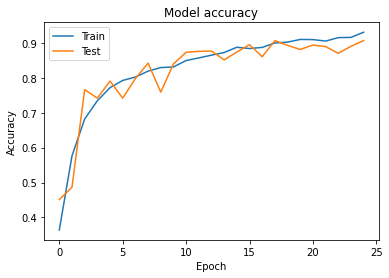

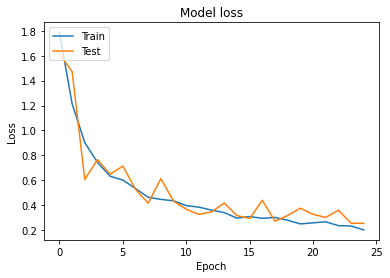

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
del model
EPOCHS=25
model = load_model(drive_path + "9model_" + str(EPOCHS) + ".h5")

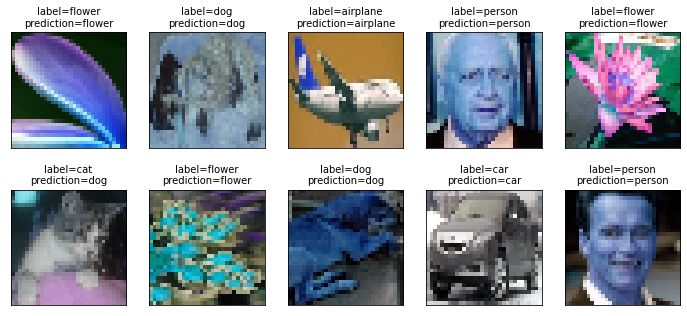

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
plot_images_labels_prediction(x_test,y_test,predictions,0,10)

In [ ]:
EPOCHS=100
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)
model.save(drive_path + "9model_" + str(EPOCHS) + ".h5")

Epoch 1/100
138/138 [==============================] - 15s 29ms/step - loss: 1.8934 - accuracy: 0.3377 - val_loss: 1.4942 - val_accuracy: 0.4774
Epoch 2/100
138/138 [==============================] - 3s 21ms/step - loss: 1.2481 - accuracy: 0.5472 - val_loss: 1.2292 - val_accuracy: 0.5788
Epoch 3/100
138/138 [==============================] - 3s 21ms/step - loss: 0.9843 - accuracy: 0.6410 - val_loss: 0.9415 - val_accuracy: 0.6730
Epoch 4/100
138/138 [==============================] - 3s 21ms/step - loss: 0.7530 - accuracy: 0.7309 - val_loss: 0.7178 - val_accuracy: 0.7400
Epoch 5/100
138/138 [==============================] - 3s 21ms/step - loss: 0.6568 - accuracy: 0.7581 - val_loss: 0.5688 - val_accuracy: 0.8152
Epoch 6/100
138/138 [==============================] - 3s 21ms/step - loss: 0.5739 - accuracy: 0.7878 - val_loss: 0.6339 - val_accuracy: 0.7917
Epoch 7/100
138/138 [==============================] - 3s 21ms/step - loss: 0.4919 - accuracy: 0.8183 - val_loss: 0.6292 - val_accuracy

In [ ]:
print("train")
train_loss_acc = model.evaluate(x_train, y_train)
print("test")
test_loss_acc = model.evaluate(x_test, y_test)

train
173/173 [==============================] - 3s 15ms/step - loss: 0.0703 - accuracy: 0.9779
test
44/44 [==============================] - 1s 19ms/step - loss: 0.2819 - accuracy: 0.9268


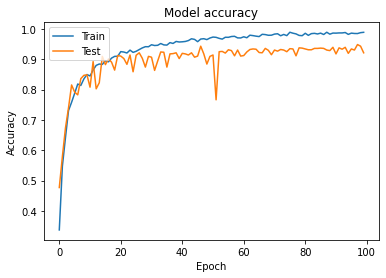

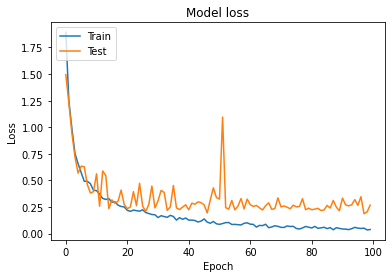

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
del model
EPOCHS=100
model = load_model(drive_path + "9model_" + str(EPOCHS) + ".h5")

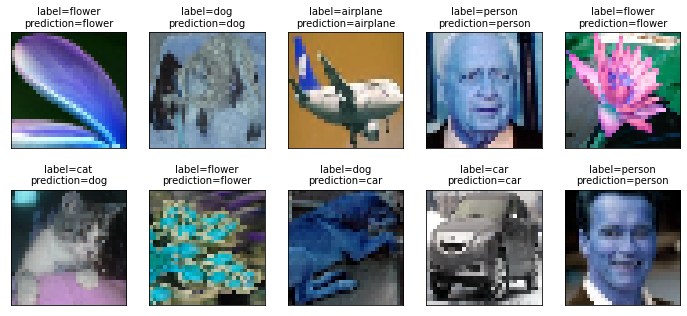

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
plot_images_labels_prediction(x_test,y_test,predictions,0,10)

**============================================================================**